> # Select data vectors by similarity using a metric score

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br/)  
> Federal University of ABC, Brazil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'./../functions')
from similarity import similarity, mse

np.set_printoptions(precision=3)

%load_ext line_profiler
%load_ext watermark
%watermark -u -t -d -m -v --iversions

Last updated: 2023-07-31 22:53:14

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

Compiler    : GCC 12.2.0
OS          : Linux
Release     : 6.2.0-26-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit

matplotlib: 3.7.2
sys       : 3.11.4 | packaged by conda-forge | (main, Jun 10 2023, 18:08:17) [GCC 12.2.0]
numpy     : 1.25.1



In [2]:
help(similarity)

Help on function similarity in module similarity:

similarity(y, axis1=0, axis2=1, threshold=0, nmin=3, recursive=True, metric=<function mse at 0x7fd7e41e7060>, msg=True, **kwargs)
    Select data vectors by similarity using a metric score.
    
    Parameters
    ----------
    y : numpy array
        Array for the calculation of mse w.r.t. to a central statistics.
    axis1 : integer, optional (default = 0)
        Axis to slice `y` ndarray in the calculation of mse.
    axis2 : integer, optional (default = 1)
        Axis to slice `y` ndarray in the calculation of the `central`.
    threshold : float, optional (default = 0)
        If greater than 0, vector with mse above it will be discarded.
        If 0, threshold will be automatically calculated as the
        minimum of [pct[1] + 1.5*(pct[2]-pct[0]), score[-2], 3], where
        score[-2] is the before largest mse value among the vectors
        calculated at the first time (not updated by `recursive` option.
    nmin : interge

### Example

Calculated threshold: 3.0
Data vectors discarded (in dimension 1, n=4): [6 0 2 8]


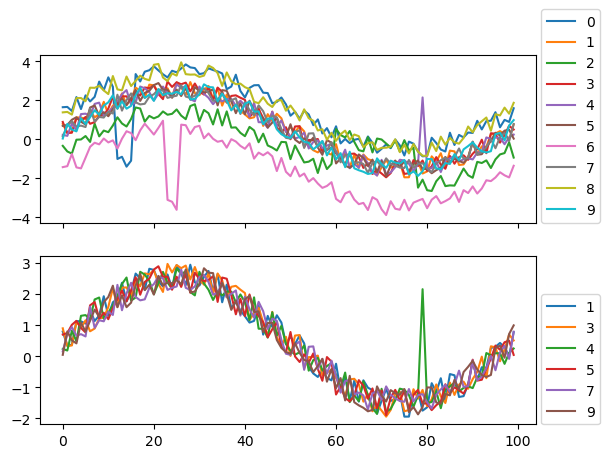

In [3]:
>>> import numpy as np
>>> import matplotlib.pyplot as plt
>>> rng = np.random.default_rng()
>>> t, n = 100, 10
>>> y = rng.random((t, n))
>>> y +=  np.atleast_2d(2*np.sin(2*np.pi*np.linspace(0, 1, t))).T
>>> for i in range(0, n, 2):
>>>    j = rng.integers(t-20)
>>>    p = rng.integers(20)
>>>    y[j:j+p, i] = y[j:j+p, i] + rng.integers(10) - 5
>>>    y[:, i] += rng.integers(4) - 2
>>> ys, ikept, inotkept, score_all = similarity(y)
>>> fig, axs = plt.subplots(2, 1, sharex=True)
>>> axs[0].plot(y, label=list(range(n)))
>>> axs[0].legend(loc=(1.01, 0))
>>> axs[1].plot(ys, label= ikept.tolist())
>>> axs[1].legend(loc=(1.01, 0))
>>> plt.show()

In [4]:
ys, ikept, inotkept, score_all = similarity(y, threshold=0, nmin=3, recursive=True, metric=mse,
                                            msg=1, central=np.nanmedian, normalization=np.nanmedian)

Calculated threshold: 3.0
Data vectors discarded (in dimension 1, n=4): [6 0 2 8]


In [5]:
ys.shape

(100, 6)

In [6]:
ikept

array([1, 3, 4, 5, 7, 9])

In [7]:
inotkept

array([6, 0, 2, 8])

In [8]:
score_all

array([[ 9.409,  0.636,  7.309,  0.597,  1.364,  0.48 , 30.735,  0.463,
         7.043,  0.625],
       [11.081,  0.853, 10.248,  0.844,  1.831,  0.683,    nan,  0.723,
         7.887,  1.   ],
       [   nan,  0.993, 11.638,  0.935,  2.129,  0.752,    nan,  0.717,
        11.028,  1.007],
       [   nan,  1.   ,    nan,  0.912,  2.167,  0.737,    nan,  0.939,
        10.509,  1.149],
       [   nan,  1.106,    nan,  0.951,  2.359,  0.776,    nan,  0.895,
           nan,  1.049]])

## Function profiling

In [9]:
%%timeit
ys, ikept, inotkept, score_all = similarity(y, msg=0)

1.9 ms ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%lprun -f similarity similarity(y, msg=0)

Timer unit: 1e-09 s

Total time: 0.00405494 s
File: /home/marcos/adrive/Python/BMC/notebooks/./../functions/similarity.py
Function: similarity at line 61

Line #      Hits         Time  Per Hit   % Time  Line Contents
    61                                           def similarity(y, axis1=0, axis2=1, threshold=0, nmin=3,
    62                                                          recursive=True, metric=mse, msg=True, **kwargs):
    63                                               """Select data vectors by similarity using a metric score.
    64                                           
    65                                               Parameters
    66                                               ----------
    67                                               y : numpy array
    68                                                   Array for the calculation of mse w.r.t. to a central statistics.
    69                                               axis1 : integer, optional (de

## Function `similarity`

In [11]:
# %load ./../functions/similarity.py
"""Select data vectors by similarity using a metric score.
"""

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'similarity.py v.1.0.0 20123/07/31'
__license__ = "MIT"

import numpy as np

def mse(y, axis1=0, axis2=1, central=np.nanmedian, normalization=np.nanmedian):
    """Mean Squared Error of `y` w.r.t. `central` across axis2 over axis1.

    Parameters
    ----------
    y : numpy array
        array for the calculation of mse w.r.t. to a central statistics
    axis1 : integer, optional (default = 0)
        axis to slice `y` ndarray in the calculation of mse.
    axis2 : integer, optional (default = 1)
        axis to slice `y` ndarray in the calculation of the `central`.
    central : Python function, optional (default = np.nanmedian)
        function to calculate statistics on `y` w.r.t. mse is computed.
    normalization : Python function, optional (default = np.nanmedian)
        function to normalize the calculated mse values

    Returns
    -------
    score : numpy array
        Mean Squared Error values

    References
    ----------
    .. [1] https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/Similarity.ipynb

    Examples
    --------
    >>> import numpy as np
    >>> rng = np.random.default_rng()
    >>> y = rng.random((100, 10))
    >>> y +=  np.atleast_2d(np.sin(2*np.pi*np.linspace(0, 1, 100))).T
    >>> mse(y, axis1=0, axis2=1, central=np.nanmedian, normalization=np.nanmedian)

    Version history
    ---------------
    '1.0.0':
        First release version
    """

    import numpy as np

    score = np.empty((y.shape[axis2]))
    score.fill(np.nan)
    idx = np.where(~np.all(np.isnan(y), axis=axis1))[0]  # masked array is slow
    y = y.swapaxes(0, axis2)[idx, ...].swapaxes(0, axis2)  # faster than .take
    score[idx] = np.nanmean((y - central(y, axis=axis2, keepdims=True))**2, axis=axis1)
    if normalization is not None:
        score = score/normalization(score)
    return score


def similarity(y, axis1=0, axis2=1, threshold=0, nmin=3,
               recursive=True, metric=mse, msg=True, **kwargs):
    """Select data vectors by similarity using a metric score.

    Parameters
    ----------
    y : numpy array
        Array for the calculation of mse w.r.t. to a central statistics.
    axis1 : integer, optional (default = 0)
        Axis to slice `y` ndarray in the calculation of mse.
    axis2 : integer, optional (default = 1)
        Axis to slice `y` ndarray in the calculation of the `central`.
    threshold : float, optional (default = 0)
        If greater than 0, vector with mse above it will be discarded.
        If 0, threshold will be automatically calculated as the
        minimum of [pct[1] + 1.5*(pct[2]-pct[0]), score[-2], 3], where
        score[-2] is the before largest mse value among the vectors
        calculated at the first time (not updated by `recursive` option.
    nmin : interger, optional (default = 3)
        If greater than 0, minumum number of vectors to keep.
        If lower than 0, maximum number of vectors to discard.
    recursive :bool, optional (default = True)
        Whether to calculate similarity metric recursevely. With the
        recursive option, the mse values are computed again each time a
        vector is discarded.
    metric :
        Function to use as metric to compute similarity.
    msg : bool, optional (default = True)
        Whether to print some messages.
    kwargs : optional
        Options for the metric function (see mse function).

    Returns
    -------
    y : numpy array
        Array similar to input `y` but with vectors discarded.
    ikept : numpy array
        Indexes of kept vectors.
    inotkept : numpy array
        Indexes of not kept (discarded) vectors.
    score_all : numpy array
        Mean Squared Error values.

    References
    ----------
    .. [1] https://nbviewer.org/github/BMClab/BMC/blob/master/notebooks/Similarity.ipynb

    Examples
    --------
    >>> import numpy as np
    >>> import matplotlib.pyplot as plt
    >>> rng = np.random.default_rng()
    >>> t, n = 100, 10
    >>> y = rng.random((t, n))
    >>> y +=  np.atleast_2d(2*np.sin(2*np.pi*np.linspace(0, 1, t))).T
    >>> for i in range(0, n, 2):
    >>>    j = rng.integers(t-20)
    >>>    p = rng.integers(20)
    >>>    y[j:j+p, i] = y[j:j+p, i] + rng.integers(10) - 5
    >>>    y[:, i] += rng.integers(4) - 2
    >>> ys, ikept, inotkept, score_all = similarity(y)
    >>> fig, axs = plt.subplots(2, 1, sharex=True)
    >>> axs[0].plot(y, label=list(range(n)))
    >>> axs[0].legend(loc=(1.01, 0))
    >>> axs[1].plot(ys, label= ikept.tolist())
    >>> axs[1].legend(loc=(1.01, 0))
    >>> plt.show()

    Version history
    ---------------
    '1.0.0':
        First release version
    """

    import numpy as np

    if y.ndim < 2:
        raise Exception('The input array must be at least a 2-D array.')
    y = y.copy()
    score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
    score_all = np.atleast_2d(score)
    ikept = np.where(~np.isnan(score))[0]  # indexes of kept vectors
    inotkept = np.where(np.isnan(score))[0]  # indexes of not kept (discarded) vectors
    idx = np.argsort(score)
    score = score[idx]
    n = np.count_nonzero(~np.isnan(score))  # number of kept vectors
    if n < 3:
        raise Exception('The input array must have at least 3 valid vectors.')
    if nmin < 0:
        nmin = np.max([3, n + nmin])
    if threshold == 0:
        pct = np.nanpercentile(score, [25, 50, 75])
        threshold = np.min([pct[1] + 1.5*(pct[2]-pct[0]), score[-2], 3])
        if msg:
            print(f'Calculated threshold: {threshold}')
    if not recursive:  # discard all vectors at once
        idx2 = np.nonzero(score > threshold)[0]  # vectors to discard
        if len(idx2) > 0:
            if n > nmin:  # keep at least nmin vectors
                inotkept = np.r_[inotkept, idx[idx2[-(y.shape[axis2] - nmin):]][::-1]]
                y.swapaxes(0, axis2)[inotkept, ...] = np.nan
                score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
                score_all = np.vstack((score_all, score))
            elif msg:
                print(f'Number of vectors to discard is greater than number to keep ({n}).')
    else:  # discard vectors with largest updated score one by one
        while n > nmin and score[n-1] > threshold:
            inotkept = np.r_[inotkept, idx[n-1]]
            y.swapaxes(0, axis2)[inotkept[-1], ...] = np.nan
            score = metric(y, axis1=axis1, axis2=axis2, **kwargs)
            score_all = np.vstack((score_all, score))
            idx = np.argsort(score)
            score = score[idx]
            n = n - 1
        if msg and n == nmin and score[n-1] > threshold:
            print(f'Number of vectors to discard is greater than number to keep ({n}).')

    if len(inotkept):
        ikept = np.setdiff1d(ikept, inotkept)
        y = y.swapaxes(0, axis2)[ikept, ...].swapaxes(0, axis2)
        if msg:
            print(f'Data vectors discarded (in dimension {axis2}, n={len(inotkept)}): {inotkept}')

    return y, ikept, inotkept, score_all